<div style="">
   <h1>Avance Deserción Educativa</h1>
   <h4>Deserción Escolar y sus Posibles Causas<br>Armando Valdés López<br>Octubre 2019</h4>
</div>
<br>


<div>
 <div style="float:left; margin-right:10px; margin-top:7px;">
   <img src="https://i0.wp.com/icaepp.com/wp-content/uploads/2017/08/logoCiestaam.jpg?resize=224%2C181"
        width="60"  style=""/>
 </div>
    
<div style="float:left; margin-right:2px;">
 <img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="60"  style="" />
</div>
<div style="float:left;">
 <img src="https://seeklogo.net/wp-content/uploads/2015/09/google-favicon-vector-200x200.png"
        width="60"  style="" />
</div>
</div>

   
       
     

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import summary_table

## 01.-Entendimiento del Negocio

###### De acuerdo al diario "El PAIS" :  Más de un millón de alumnos abandonan sus estudios en México cada año. Uno de cada siete adolescentes que cursan el bachillerato deja de estudiar en el país


##### El diario "El financiero" reportó en 2018 que aumenta deserción escolar por falta de interés y problemas económicos

##### En febrero de este año la revista "Expansión" reportó que en México, 49.7% de alumnos dejaron inconclusa su vida académica

## 02.-Entendimiento de los Datos

In [3]:
Base_de_Datos= pd.read_excel('C:/Users/valde/OneDrive/SASUniversityEdition/myfolders/Bases_de_Datos/Avance_Metodos.xlsx')
Datos=pd.DataFrame(Base_de_Datos)

#### Los datos se extrajeron del portal de datos abiertos del gobierno federal https://datos.gob.mx, se utiliza solo una fraccion del repositorio "Carencias por Municipio"

In [4]:
print("Observaciones y Variables",Datos.shape)

Observaciones y Variables (2456, 9)


#### Estructura de los datos

In [5]:
Datos.head(7)

,Estado,por_des_15,po_per_pob,por_sin_seg,por_car_salud,por_car_alim,por_po_patr,gini,por_car_haci
0,Aguascalientes,2.57861,30.531104,22.392571,18.849051,11.805700,41.900398,0.422628,3.346190
1,Baja California,4.72579,36.109801,23.602980,23.537939,11.150000,40.792099,0.420424,10.076050
2,Baja California Sur,5.38125,48.062796,18.186569,17.607830,10.155300,39.347900,0.443400,9.154690
3,Campeche,12.88437,60.545841,18.283230,20.905399,21.424200,52.135700,0.438455,26.500179
4,Coahuila de Zaragoza,3.86941,28.807374,37.289719,36.883629,4.392600,23.828199,0.351569,3.057200
5,Colima,10.50804,55.358292,16.319920,13.829610,27.773500,65.150002,0.371650,15.398750
6,Chiapas,13.90325,85.718552,37.795879,58.476822,54.707199,87.097801,0.340176,35.000290


### Significado de las variables

<h5>Estado</h5>
<p>
<h5>por_des_15:</h5>Porcentaje de personas mayores de 15 años que no van a la escuela
<h5>po_per_pob:</h5>Porcentaje de la población en pobreza
<h5>por_sin_seg:</h5>Porcentaje de la población sin seguro social
<h5>por_car_salud:</h5>Porcentaje de la población con carencia por acceso a los servicios de salud
<h5>por_car_alim:</h5>Porcentaje de la población con carencia alimentaria
<h5>por_po_patr:</h5>Porcentaje con carencia de patrimonio: Insuficiencia del ingreso disponible para adquirir la canasta alimentaria
<h5>gini:</h5>Índice de Gini
<h5>por_car_haci:</h5>Porcentaje de la población en viviendas con carencia por hacinamiento
</p>


In [5]:
summary = Datos.describe()
print("Resumen de Datos Cuantitativos")
summary.round(2).transpose()

Resumen de Datos Cuantitativos


,count,mean,std,min,25%,50%,75%,max
por_des_15,2456.0,13.98,9.63,0.56,6.48,11.82,18.99,66.55
po_per_pob,2456.0,67.42,18.52,8.75,55.62,69.86,82.55,97.35
por_sin_seg,2456.0,37.88,17.46,1.28,25.15,35.28,47.13,98.14
por_car_salud,2456.0,37.84,18.82,1.32,24.00,34.77,48.44,98.28
por_car_alim,2456.0,31.91,19.08,1.00,15.71,29.22,45.06,86.36
por_po_patr,2456.0,64.80,19.60,7.87,49.48,66.72,81.03,98.14
gini,2456.0,0.37,0.05,0.25,0.34,0.38,0.41,0.57
por_car_haci,2456.0,16.96,11.04,0.00,8.58,14.32,22.74,71.94


In [6]:
corr = Datos.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(3).set_properties(**{'height':'30pt',
'color':'black'})

,por_des_15,po_per_pob,por_sin_seg,por_car_salud,por_car_alim,por_po_patr,gini,por_car_haci
por_des_15,1,0.754,0.273,0.278,0.82,0.773,-0.467,0.691
po_per_pob,0.754,1,0.33,0.33,0.871,0.903,-0.539,0.634
por_sin_seg,0.273,0.33,1,0.952,0.259,0.291,-0.182,0.144
por_car_salud,0.278,0.33,0.952,1,0.267,0.296,-0.189,0.16
por_car_alim,0.82,0.871,0.259,0.267,1,0.956,-0.538,0.756
por_po_patr,0.773,0.903,0.291,0.296,0.956,1,-0.599,0.672
gini,-0.467,-0.539,-0.182,-0.189,-0.538,-0.599,1,-0.255
por_car_haci,0.691,0.634,0.144,0.16,0.756,0.672,-0.255,1


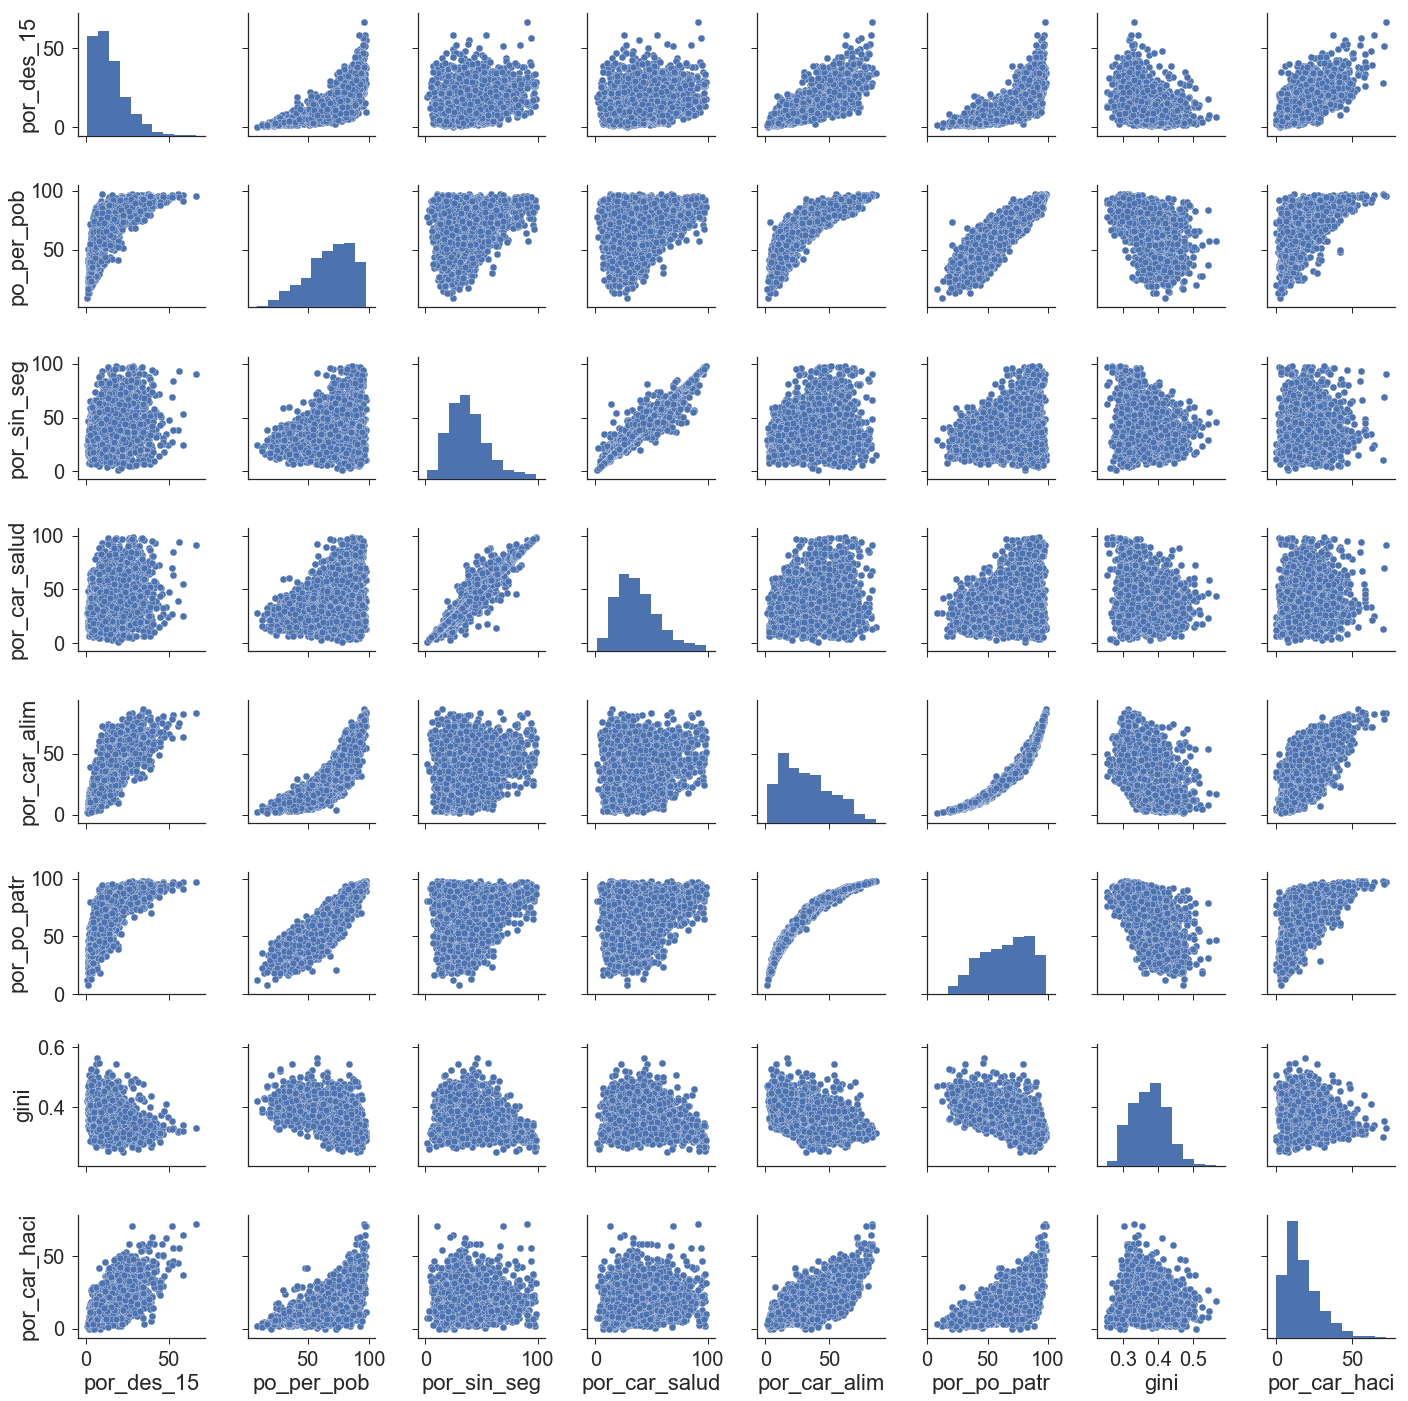

In [7]:
sns.set(style="ticks",font_scale=2)
sns.pairplot(Datos)

## 03.-Preparación de los Datos

#### No se requirió hacer minería de datos

#### Queremos saber si hay relación entre las carencias y la deserción escolar

#### Tomaremos a la variable "por_des_15" como variable dependiente

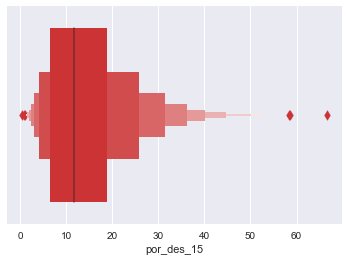

In [10]:
sns.set(font_scale=1)
ax1=sns.lvplot( x="por_des_15",data=Datos, palette="Set1")
#ax1 =sns.stripplot(x="por_des_15", data=Datos, size=4, jitter=True, color="gray")

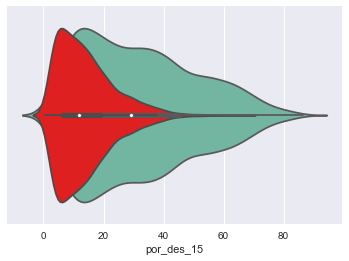

In [11]:
from seaborn import violinplot

nx=violinplot(x="por_car_alim",data=Datos,palette="Set2")
nx=violinplot(x="por_des_15",data=Datos,color= '#ff0000')


## 04.-Modelado

#### SE HIZO EL MODELO MULTIPLE SOLO PARA DARSE UNA IDEA DE LOS DATOS

In [12]:
model = ols("por_des_15~po_per_pob+por_sin_seg+por_car_salud+por_car_alim+por_po_patr+gini+por_car_haci", Datos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             por_des_15   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     832.0
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:05:14   Log-Likelihood:                -7551.8
No. Observations:                2456   AIC:                         1.512e+04
Df Residuals:                    2448   BIC:                         1.517e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.0095      1.529      4.584

### Modelo  Regresión Lineal y R2

<h4 style="color:blue;">por_des_15 -->	po_per_pob      {----0.56----} </h4>
#### por_des_15	-->por_sin_seg     ------0.07------
#### por_des_15	-->por_car_salud  ------0.07------
<h4 style="color:green;">por_des_15 -->	por_car_alim    {------0.67------} </h4>
<h4 style="color:magenta;">por_des_15 -->	por_po_patr      {------0.59------} </h4>
#### por_des_15	gini  -->                   ------0.20------
#### por_des_15	por_car_haci -->    ------0.47------


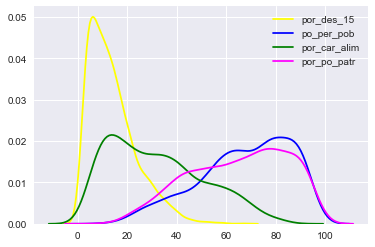

In [13]:
#Gráfico de densidad
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(Datos.por_des_15,color='yellow')
sns.kdeplot(Datos.po_per_pob,color='blue')
sns.kdeplot(Datos.por_car_alim,color='green')
sns.kdeplot(Datos.por_po_patr,color='magenta')
plt.legend();

 <h3 style="color:green"> 4.1 Modelo por_des_15 = f(por_car_alim) </h3>

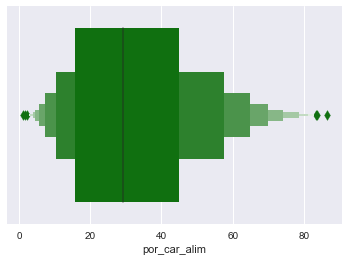

In [50]:
sns.set(font_scale=1)
ax2=sns.lvplot( x="por_car_alim",data=Datos,color="green")
#ax2 =sns.stripplot(x="por_car_alim", data=Datos, size=4, jitter=True, color="gray")

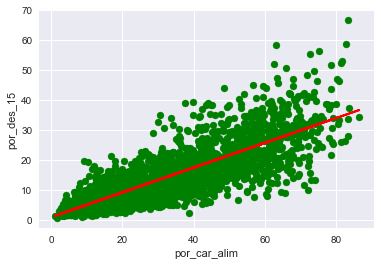

In [42]:
plt.scatter(Datos.por_car_alim,Datos.por_des_15, color='green')
plt.xlabel("por_car_alim")
plt.ylabel("por_des_15")
plt.plot(x1, fittedvalues, 'r-', lw=2)
plt.show()

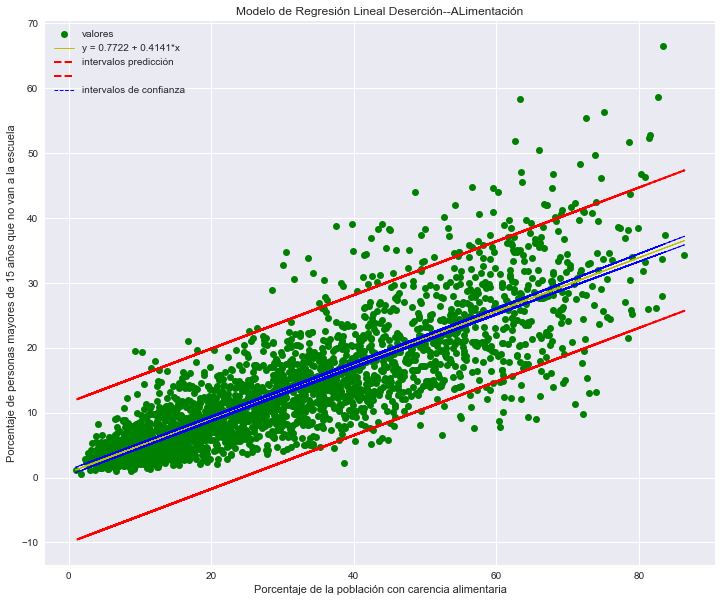

In [15]:
model1 = ols("por_des_15 ~ por_car_alim", Datos).fit()
x1=np.array(Datos.por_car_alim)
y1=np.array(Datos.por_des_15)
st, data, ss2 = summary_table(model1, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T
plt.figure(figsize=(12,10))
plt.title("Modelo de Regresión Lineal Deserción--ALimentación")
plt.xlabel("Porcentaje de la población con carencia alimentaria")
plt.ylabel("Porcentaje de personas mayores de 15 años que no van a la escuela")
plt.plot(x1,y1, 'o',color='green')
plt.plot(x1, fittedvalues, 'y-', lw=1)
plt.plot(x1, predict_ci_low, 'r--', lw=2)
plt.plot(x1, predict_ci_upp, 'r--', lw=2)
plt.plot(x1, predict_mean_ci_low, 'b--', lw=1)
plt.plot(x1, predict_mean_ci_upp, 'b--', lw=1)
plt.legend(["valores","y = 0.7722 + 0.4141*x","intervalos predicción","" ,"intervalos de confianza"], loc="upper left")
plt.show()

## Heterocedasticidad

In [60]:
import statsmodels.stats.diagnostic as smd
heterocedasticidad=smd.het_breuschpagan(model1.resid,model1.model.exog)[1]
print(heterocedasticidad)

if heterocedasticidad > 0.05:
    print("El modelo no es heterocedástico")
if heterocedasticidad < 0.05:
    print("El modelo si es heterocedástico") 

1.49019852568e-73
El modelo si es heterocedástico


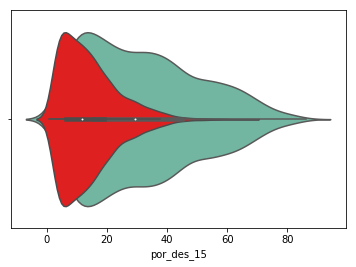

In [7]:
from seaborn import violinplot

nx=violinplot(x="por_car_alim",data=Datos,palette="Set2")
nx=violinplot(x="por_des_15",data=Datos,color= '#ff0000')

In [ ]:
#Distribución del error
valor_y_predicho = model1.predict(Datos['por_car_alim'])
#print(ypred)
plt.hist([valor_y_predicho-y1])

## 05.-Evaluación del modelo

<h3 style="color:green">5.1.-Evaluación del modelo</h3>

In [ ]:
sns.set(style="darkgrid")
g = sns.jointplot("por_car_alim", "por_des_15", data=Datos,kind="reg",
                  xlim=(-3, 90), ylim=(-1, 90), color="g")
print(model1.summary())

In [ ]:
#intervalos de confianza
st, data, ss2 = summary_table(model1, alpha=0.05)
print(st)

 <h3 style="color:blue"> 4.2 Modelo por_des_15 = f(po_per_pob) </h3>

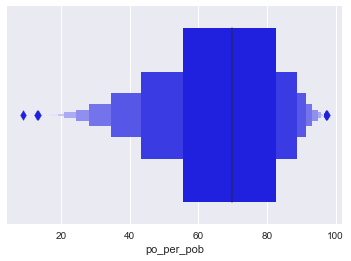

In [16]:
sns.set(font_scale=1)
ax3=sns.lvplot( x="po_per_pob",data=Datos,color="blue")
#ax3 =sns.stripplot(x="po_per_pob", data=Datos, size=4, jitter=True, color="gray")

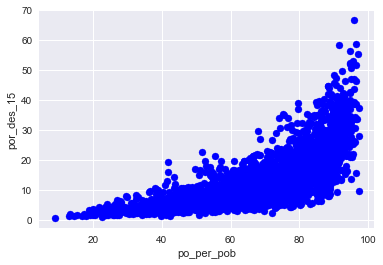

In [17]:
x2=np.array(Datos.po_per_pob).reshape((-1,1))
y2=np.array(Datos.por_des_15)

plt.scatter(x2,y2,color='blue')
plt.xlabel("po_per_pob")
plt.ylabel("por_des_15")
plt.show()

In [43]:
poli_reg=PolynomialFeatures(degree=2)
x2_pol=poli_reg.fit_transform(x2)

model2 = LinearRegression()
model2.fit(x2_pol,y2)

y_pre_model2= model2.predict(x2_pol)

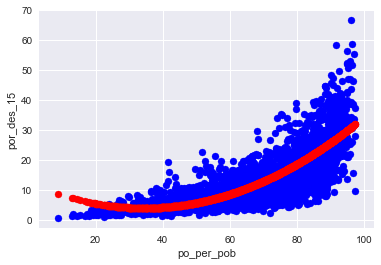

In [44]:
plt.scatter(x2,y2,color='blue')
plt.scatter(x2,y_pre_model2,color='red')
plt.xlabel("po_per_pob")
plt.ylabel("por_des_15")
plt.show()

In [45]:
R_sq2=model2.score(x2_pol,y2)
print(R_sq2)

0.648177297759


In [46]:
print("Valor de la pendiente o coeficiente a:")
print(model2.coef_)

Valor de la pendiente o coeficiente a:
[ 0.         -0.48838295  0.00708896]


In [47]:
print("Valor del intercepto:")
print(model2.intercept_)

Valor del intercepto:
12.2584170565


### por_des_15 = 12.2584170565 -0.48838295*X + 0.00708896*X2